Creates a list of all pointings, with [LIBID, RA, DECL, MJD IDEXPT  FLT GAIN NOISE SKYSIG (pixels)  RATIO  ZPTAVG ZPTERR  MAG]

In [1]:
from parse_simlib import parse_simlib

libid_details, pointings_arr = parse_simlib('../minion_1016_WFD.simlib')

print len(pointings_arr)


2083758


In [2]:
print pointings_arr[1775712-3:1775712+3,3]


[ 62707.9806  62707.9811  62708.4269  62708.4264  62708.4269  62708.4273]


In [75]:


print np.max(overhead_times[:,0])
print np.min(overhead_times[:,0])
print np.argmin(overhead_times[:,0])
print np.median(overhead_times[:,0])
print np.mean(overhead_times[:,0])
print (overhead_times[:,0] == 0).sum()





19.7571
-0.0005
1775711
0.0005
0.00175132143527
0


In [77]:
times, counts = np.unique(overhead_times, return_counts=True)
print 'Number of different overhead times: ', len(times), '\n'
print times[0:20]
print counts[0:20]
print len(counts[counts<=1])

print np.round(1.149, 1)


Number of different overhead times:  2726 

[-0.0005  0.      0.0004  0.0005  0.0006  0.0007  0.0008  0.0009  0.001
  0.0011  0.0012  0.0013  0.0014  0.0015  0.0016  0.0017  0.0018  0.0019
  0.002   0.0021]
[      1 2074957  930116 1037905   40317   19683   16409    7316    4516
    2681    2221    1779    1557    1182    1092    1807    5142     368
     687     113]
1623
1.1
2083757


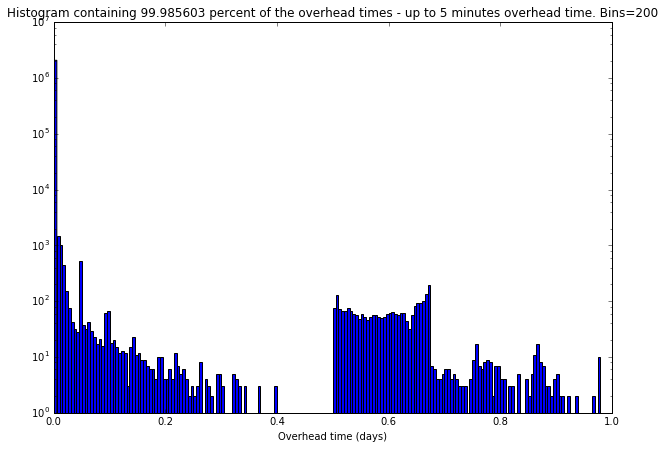

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

#only take part of the data we want
max = 0.0006944444444444445*5
parts = overhead_times[overhead_times[:,0]<=max, :]
part = parts[parts[:,0]>0, :]
part[:,0] = part[:,0] * 24 *3600

data = part[:,0]
#plot histogram
bins = 200
percentage_included = (float(len(data))*100)/len(overhead_times)
fig1 = plt.figure(figsize=(10, 7))
plt.hist(data, bins=bins)
plt.title('Histogram containing %f percent of the overhead times - up to 5 minutes overhead time. Bins=%i' %(percentage_included, bins))
plt.xlabel('Overhead time (seconds)')
plt.yscale('log')
plt.xlim([0,max*24*3600])
fig1.savefig('overhead_time/histogram_5minutes')
plt.show()
    


8800


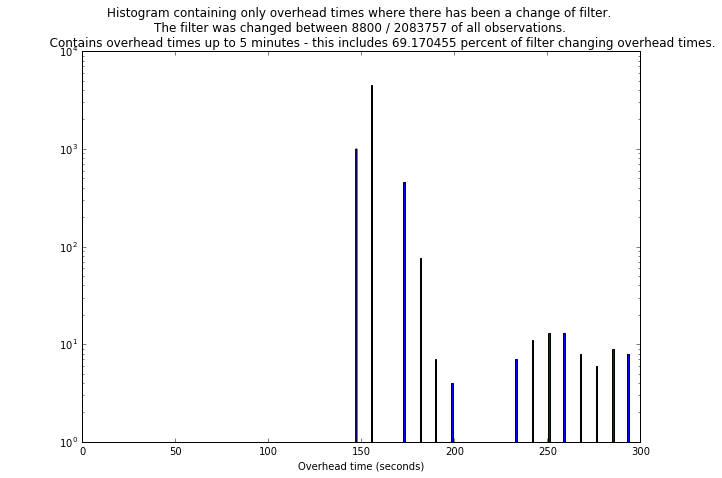

In [113]:
change_filter = overhead_times[overhead_times[:,1]==1, :]
print len(change_filter)

max=5./(24*60)
data = change_filter[change_filter[:,0]<=max, :]
data = data[:,0]*24*3600

#plot histogram
bins = 200
percentage_included = (float(len(data))*100)/len(change_filter)
fig2 = plt.figure(figsize=(10, 7))
plt.hist(data, bins=bins)
plt.title('Histogram containing only overhead times where there has been a change of filter. \n' \
          'The filter was changed between %i / %i of all observations. \n \
          Contains overhead times up to 5 minutes - this includes %f percent of filter changing overhead times.' \
         %(len(change_filter),len(overhead_times),percentage_included))
plt.xlabel('Overhead time (seconds)')
plt.yscale('log')
plt.xlim([0,max*24*3600])
fig2.savefig('overhead_time/histogram_changefilter_5mins')
plt.show()
    



In [ ]:
def whisker_plot(data):

    fig1 = plt.figure('boxplot_min_ang_perband', figsize=(6, 10))
    fig1.suptitle('Whisker plot', fontsize=14, fontweight='bold')
    plt.title('title')
    plt.boxplot(data, showfliers=False)
    plt.ylabel('Overhead time (days)')

    y = data
    x = np.random.normal(1, 0.04, size=len(y))
    plt.plot(x, y, 'g.', alpha=0.01)
    #plt.ylim((0,0.01))
    plt.show()
    return

whisker_plot(part[:,0])
